In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [81]:
df = df.dropna()

In [82]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [83]:
X = pd.get_dummies(df.drop(columns=['species']),drop_first=True)

In [84]:
y = df['species']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc = RandomForestClassifier(n_estimators=10,random_state=101)

In [89]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [90]:
preds = rfc.predict(X_test)  

In [91]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,accuracy_score

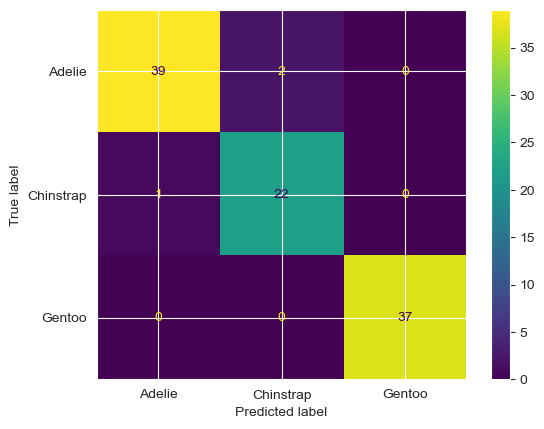

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels=rfc.classes_)
disp.plot()
plt.show()

In [93]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101


In [94]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/data_banknote_authentication.csv")
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


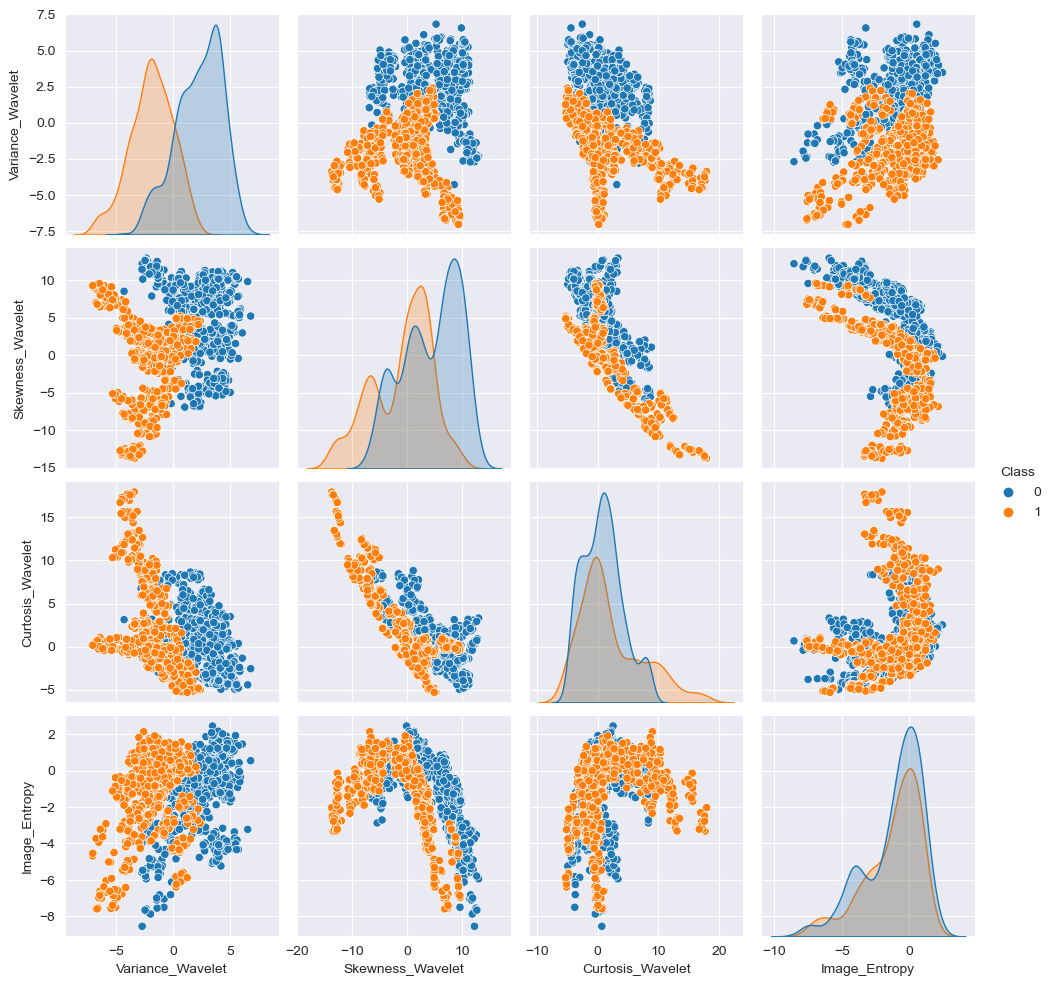

In [95]:
sns.pairplot(df,hue="Class")

In [96]:
X = df.drop(columns=["Class"])

In [97]:
y = df['Class']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=101)

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

In [103]:
n_estimators = [64,100,128,200]

In [104]:
max_features = [2,3,4]

In [105]:
bootstrap = [True,False]

In [106]:
oob_score = [True,False]

In [107]:
param_grid = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}

In [108]:
rfc = RandomForestClassifier()

In [109]:
grid = GridSearchCV(rfc,param_grid)

In [110]:
grid.fit(X_train,y_train)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/ensemble/_forest.py",

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [111]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}

In [112]:
rfc = RandomForestClassifier(max_features=2,n_estimators=200,oob_score=True)

In [113]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [114]:
rfc.oob_score_

0.9948542024013722

In [115]:
predictions = rfc.predict(X_test)

In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206


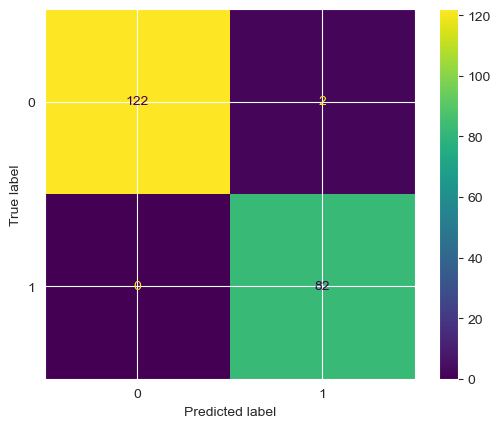

In [117]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=rfc.classes_)
disp.plot()
plt.show()

In [118]:
errors = []
misclassification = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassification.append(n_missed)

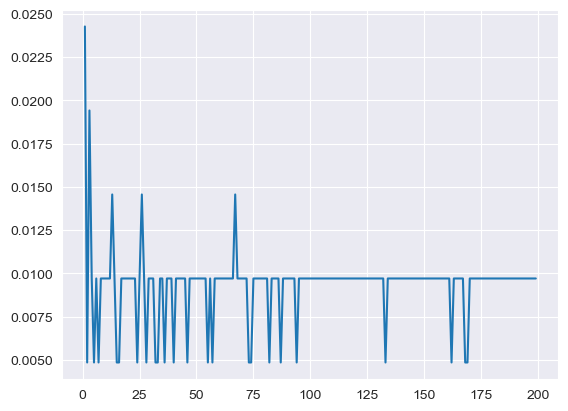

In [119]:
plt.plot(range(1,200),errors)

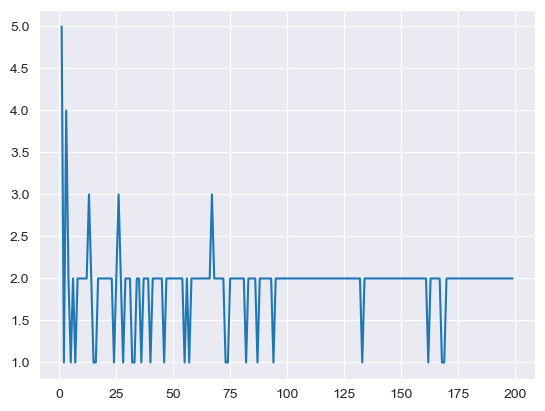

In [120]:
plt.plot(range(1,200),misclassification)

Coding Regression

In [121]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [122]:
df.columns = ['Signal', 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

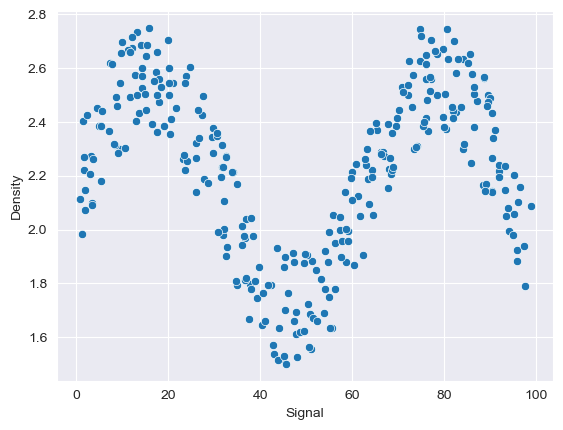

In [123]:
sns.scatterplot(x="Signal", y="Density", data=df)

In [124]:
X = df['Signal'].values.reshape(-1,1)

In [125]:
y = df['Density']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=101)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lr_model = LinearRegression()

In [129]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [130]:
lr_preds = lr_model.predict(X_test)

In [131]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [133]:
mean_absolute_error(y_test,lr_preds)

0.21119897331863297

In [134]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [135]:
signal_range = np.arange(0,100)
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

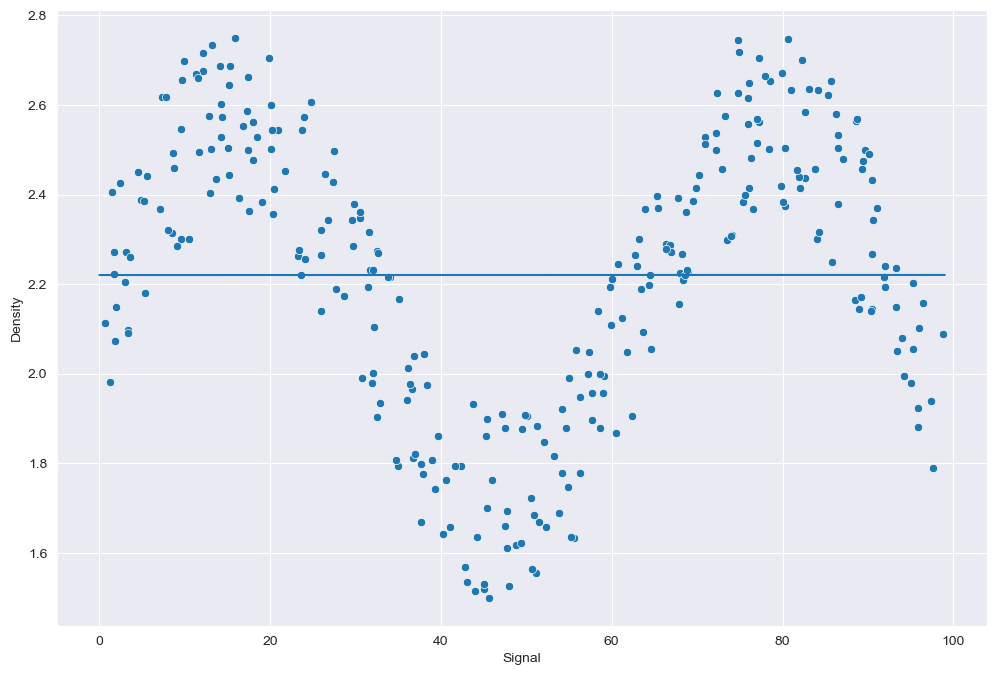

In [136]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x="Signal", y="Density", data=df)
plt.plot(signal_range,signal_preds)


In [137]:
def run_model(model,X_train,y_train,X_test,y_test):
    #fit model training
    model.fit(X_train,y_train)
    #get metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    #plot results model signal range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))

    plt.figure(figsize=(12,8),dpi=100)
    sns.scatterplot(x="Signal", y="Density", data=df,color='black')
    plt.plot(signal_range,signal_preds)



In [138]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [142]:
pipe = make_pipeline(PolynomialFeatures(degree=4),LinearRegression())

MAE: 0.1184764278844634
RMSE: 0.14588633397573553


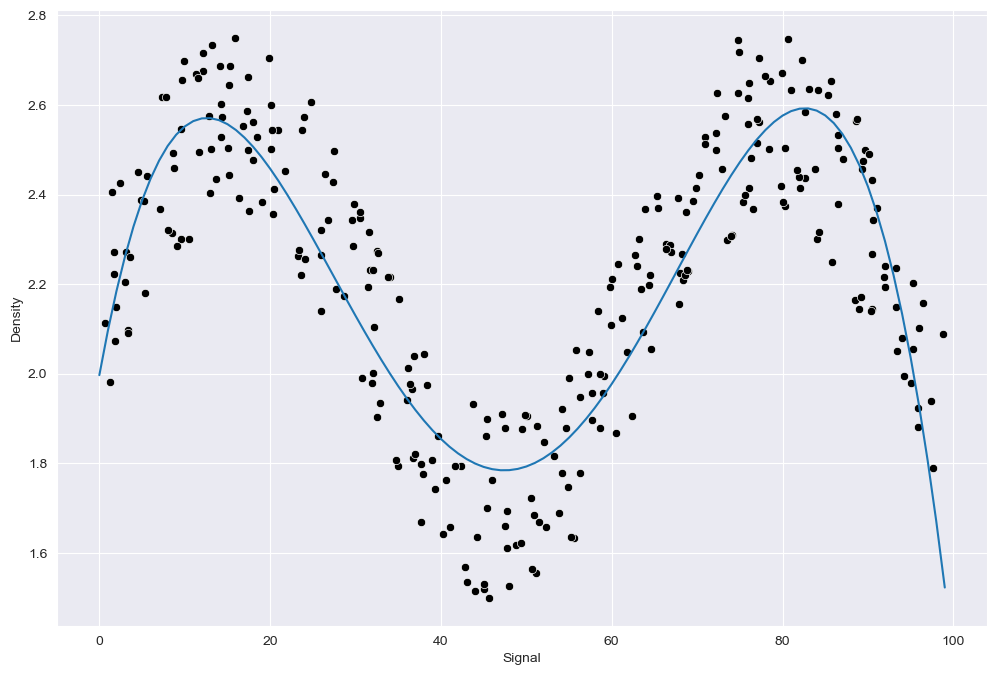

In [143]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [144]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442386
RMSE: 0.15234870286353372
MAE: 0.12198383614100569
RMSE: 0.13730685016923658
MAE: 0.11635971693292668
RMSE: 0.13277855732740923


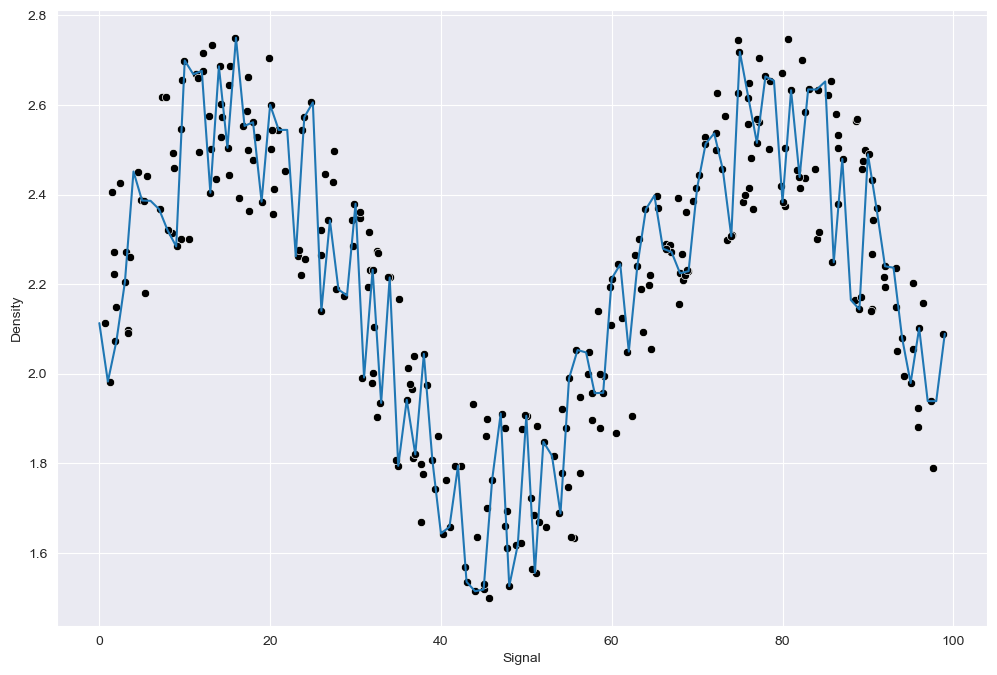

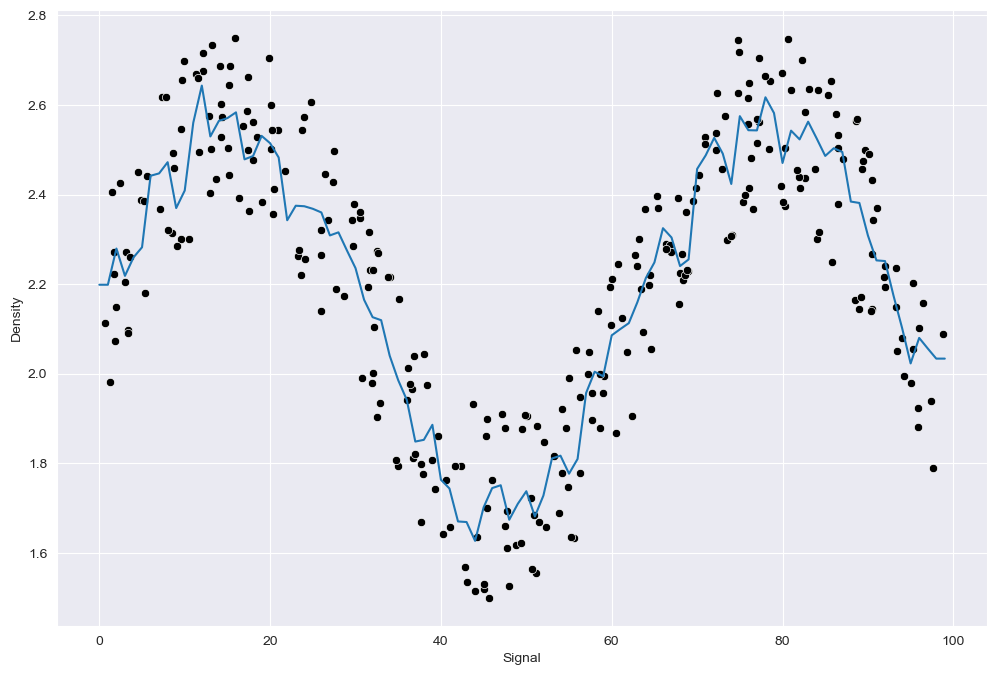

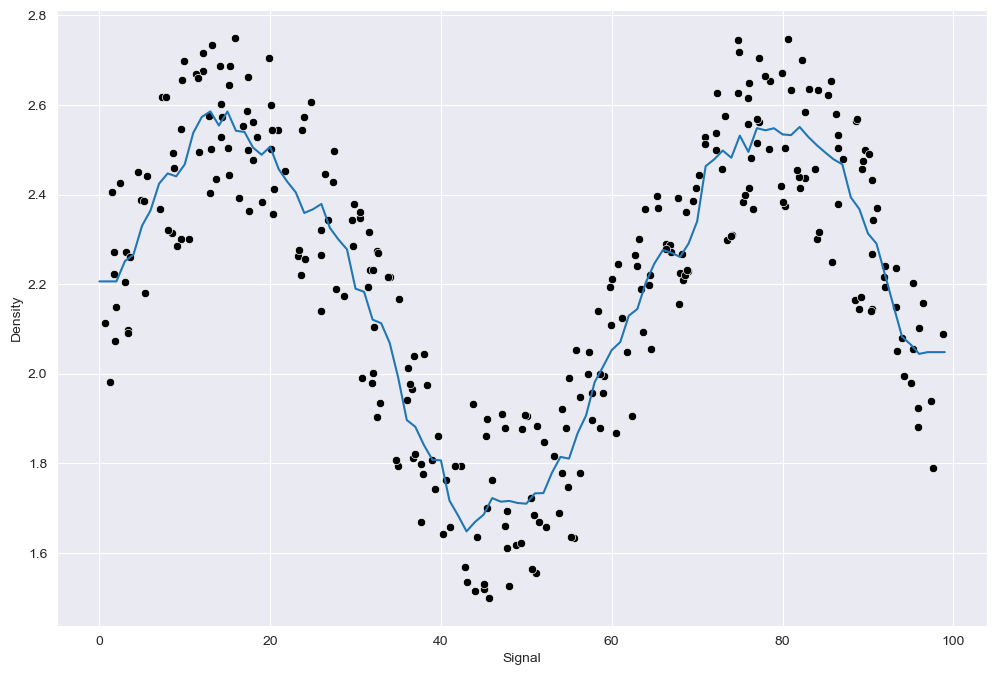

In [145]:
k_values = [1,5,10]

for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)
    

In [148]:
from sklearn.svm import SVR

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
svr = SVR()
param_grid = {'C':[0.01,0.1,5,10,100,1000],
              'gamma' :['auto','scale']}



grid = GridSearchCV(svr,param_grid)

MAE: 0.10839555187432501
RMSE: 0.1263507854819897


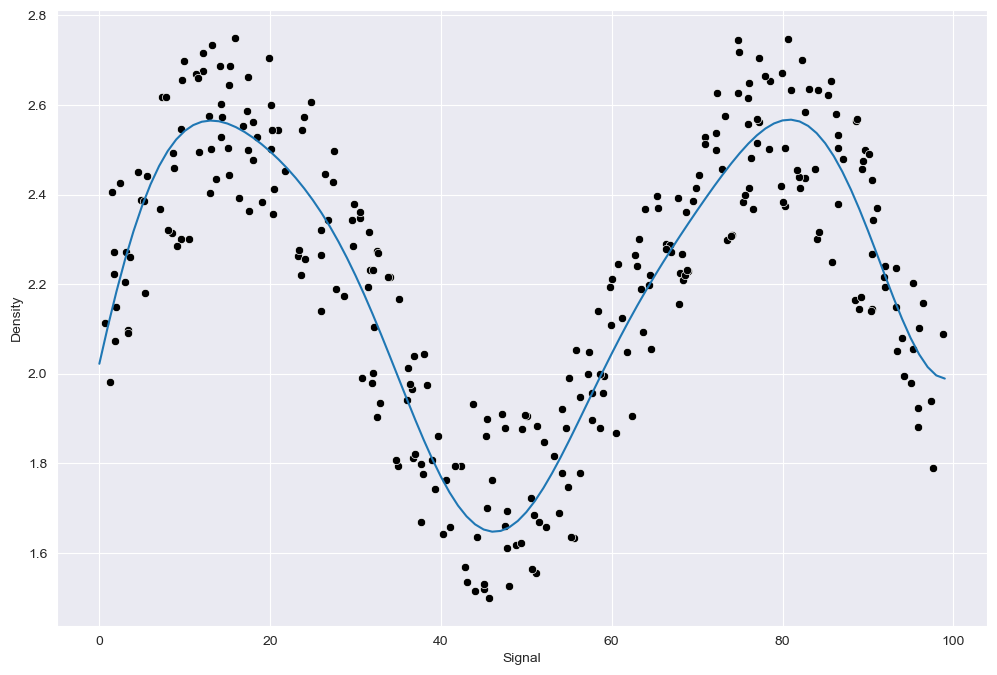

In [152]:
run_model(grid,X_train,y_train,X_test,y_test)

In [153]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.12243634959748678
RMSE: 0.14597429150825225


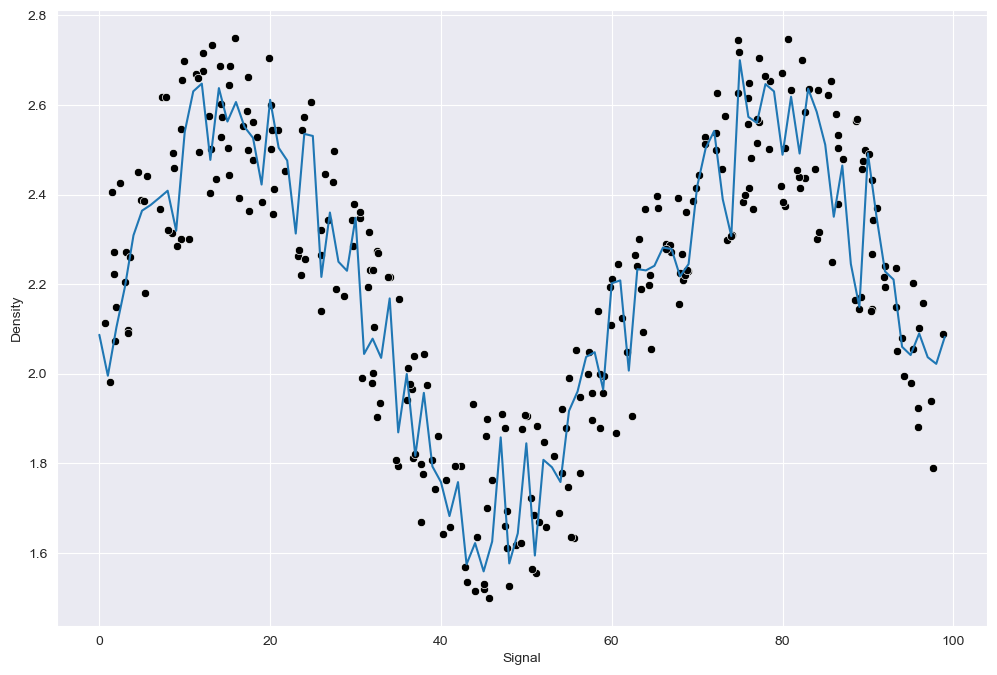

In [156]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [161]:
from sklearn.ensemble import AdaBoostRegressor

MAE: 0.11358906858176936
RMSE: 0.1323391204631499


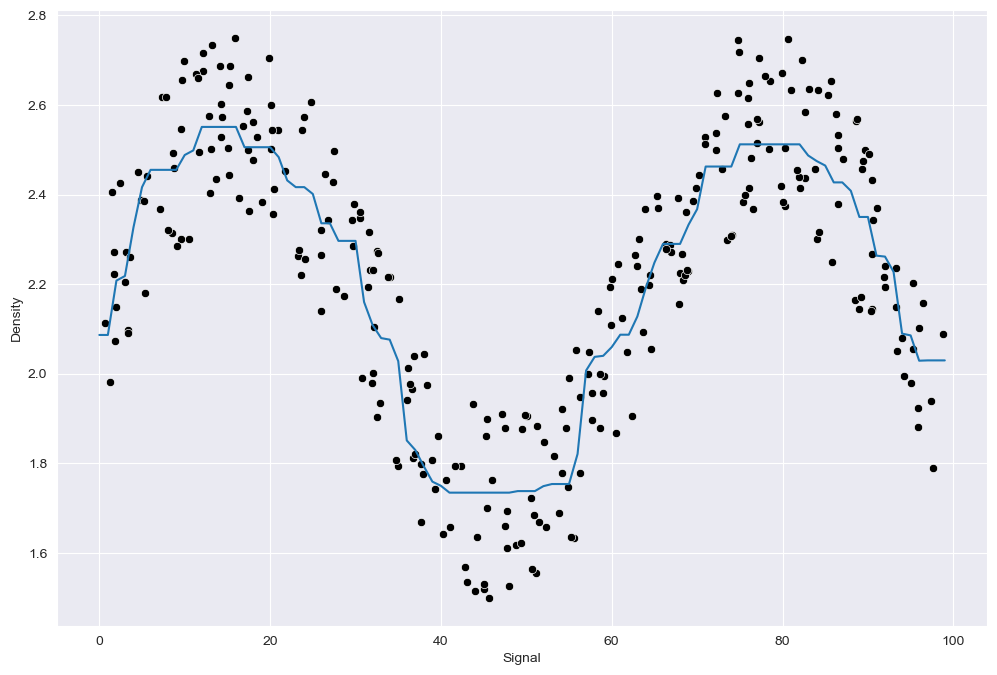

In [163]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)